In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from matplotlib import pyplot as plt
import msgpack

from stellarpunk import econ_sim, serialization

In [2]:
%load_ext autoreload
%autoreload 1
%aimport stellarpunk.serialization
%aimport stellarpunk.econ_sim

In [3]:
#production_chain_df = pd.DataFrame(msgpack.unpackb(open("/tmp/production_chain.log", "rb").read(), object_hook=serialization.decode_matrix))
production_chain = serialization.load_production_chain(open("/tmp/production_chain.log", "rb").read())
production_chain_df = production_chain.adj_matrix

In [4]:
production_chain_df.shape

(30, 30)

In [5]:
agent_goods_df = pd.DataFrame(msgpack.unpackb(open("/tmp/agent_goods.log", "rb").read(), object_hook=serialization.decode_matrix))

In [6]:
agent_goods_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Transactions

In [7]:
columns = ["tick", "seller", "buyer", "product", "amount", "price"]
transaction_df = pd.read_csv("/tmp/transactions.log", sep="\t", header=None, names=columns)

In [8]:
transaction_df["value"] = transaction_df["amount"] * transaction_df["price"]

In [9]:
transaction_df

,tick,seller,buyer,product,amount,price,value
0,1,4,9,4,10.0,30.150000,301.500000
1,1,0,5,0,10.0,14.070000,140.700000
2,1,3,8,3,10.0,10.050000,100.500000
3,1,1,6,1,10.0,7.035000,70.350000
4,1,2,7,2,10.0,6.030000,60.300000
...,...,...,...,...,...,...,...
411637,99998,3,8,3,10.0,8.074860,80.748597
411638,99998,1,6,1,10.0,5.830709,58.307087
411639,99999,4,9,4,10.0,22.166807,221.668072
411640,99999,3,8,3,10.0,8.074860,80.748597


Text(0.5, 1.0, 'transaction count by tick')

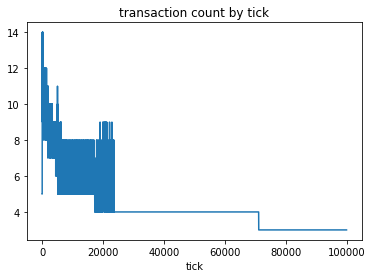

In [10]:
transaction_df.groupby("tick")["price"].count().plot()
plt.title("transaction count by tick")

Text(0.5, 1.0, 'product 0 transaction count per tick')

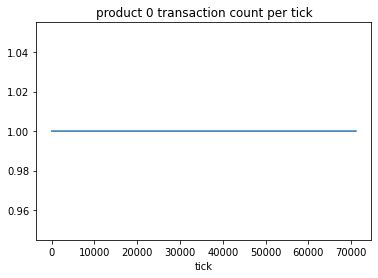

In [11]:
transaction_df[transaction_df["product"] == 0].groupby("tick")["price"].count().plot()
plt.title("product 0 transaction count per tick")

Text(0.5, 1.0, 'transaction unit quantity per tick')

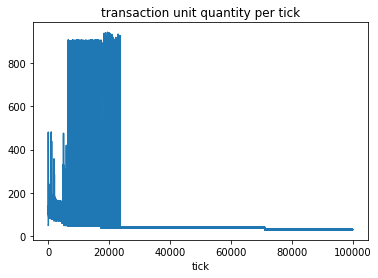

In [12]:
transaction_df.groupby("tick")["amount"].sum().plot()
plt.title("transaction unit quantity per tick")

Text(0.5, 1.0, 'transaction value per tick')

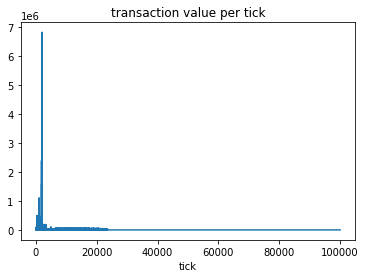

In [13]:
transaction_df.groupby("tick")["value"].sum().plot()
plt.title("transaction value per tick")

Text(0.5, 1.0, 'distinct products sold per tick')

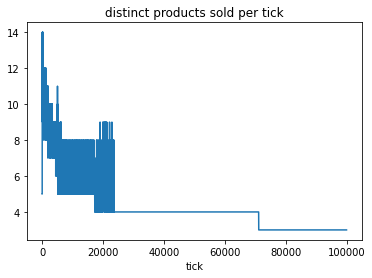

In [14]:
transaction_df.groupby("tick")["product"].nunique().plot()
plt.title("distinct products sold per tick") 

Text(0.5, 1.0, 'distinct sellers per tick')

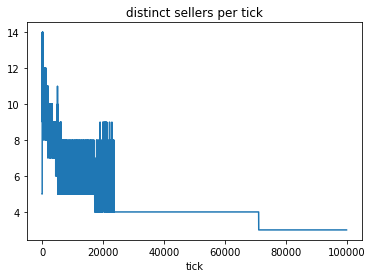

In [15]:
transaction_df.groupby("tick")["seller"].nunique().plot()
plt.title("distinct sellers per tick")

Text(0.5, 1.0, 'distinct buyers per tick')

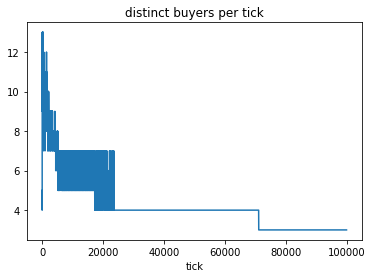

In [16]:
transaction_df.groupby("tick")["buyer"].nunique().plot()
plt.title("distinct buyers per tick")

In [17]:
transaction_df["seller"].nunique()

21

In [18]:
transaction_df["buyer"].nunique()

23

In [19]:
transaction_df["product"].nunique()

21

<AxesSubplot:>

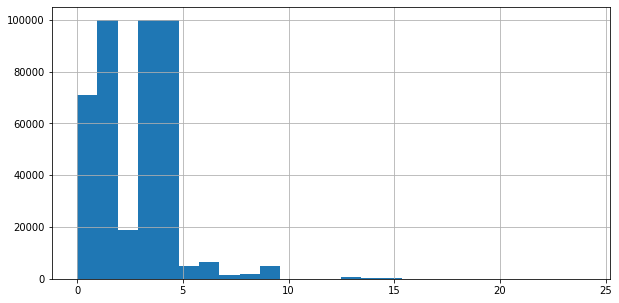

In [20]:
plt.figure(figsize=(10,5))
transaction_df["product"].hist(bins=transaction_df["product"].max()+1)

Text(0.5, 1.0, 'max product id sold each tick')

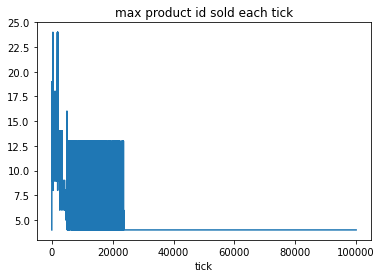

In [21]:
transaction_df.groupby("tick")["product"].max().plot()
plt.title("max product id sold each tick")

In [22]:
transaction_df[transaction_df["seller"] == 3]["price"].describe()

count    99994.000000
mean         8.074946
std          0.010712
min          8.074860
25%          8.074860
50%          8.074860
75%          8.074860
max         10.593280
Name: price, dtype: float64

Text(0.5, 1.0, 'price of product 0 over time')

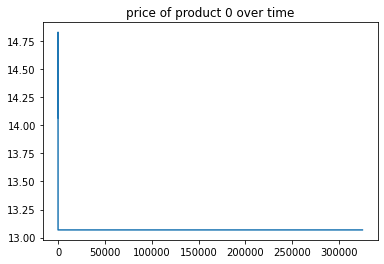

In [23]:
transaction_df[transaction_df["seller"] == 0]["price"].plot()
plt.title("price of product 0 over time")

Text(0.5, 1.0, 'price of product 2 over time')

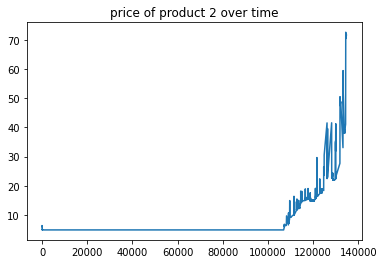

In [24]:
transaction_df[transaction_df["seller"] == 2]["price"].plot()
plt.title("price of product 2 over time")

Text(0.5, 1.0, 'price of product 6 over time')

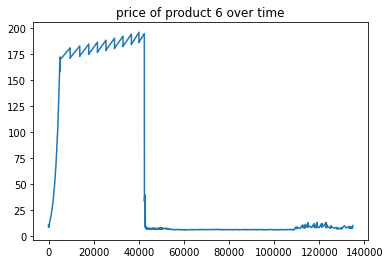

In [25]:
transaction_df[transaction_df["seller"] == 6]["price"].plot()
plt.title("price of product 6 over time")

<AxesSubplot:>

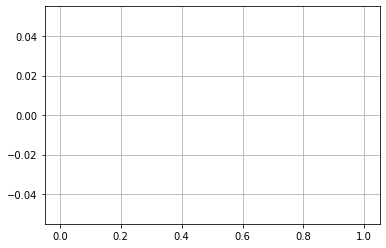

In [26]:
transaction_df[transaction_df["buyer"] == 3]["price"].hist()

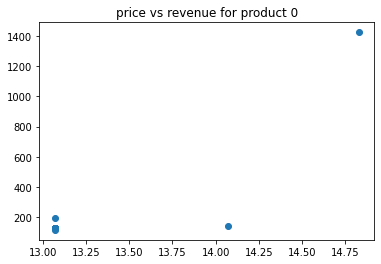

In [27]:
plt.scatter(transaction_df[transaction_df["product"] == 0].groupby("tick")["price"].mean(), transaction_df[transaction_df["product"] == 0].groupby("tick")["value"].sum())
plt.title("price vs revenue for product 0")
plt.show()

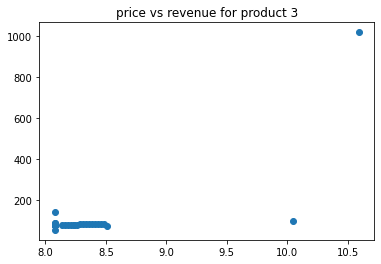

In [28]:
plt.scatter(transaction_df[transaction_df["product"] == 3].groupby("tick")["price"].mean(), transaction_df[transaction_df["product"] == 3].groupby("tick")["value"].sum())
plt.title("price vs revenue for product 3")
plt.show()

In [29]:
transaction_df[(transaction_df["price"] > 12) & (transaction_df["product"] == 0)]

,tick,seller,buyer,product,amount,price,value
1,1,0,5,0,10.0,14.070000,140.700000
11,7,0,5,0,96.0,14.830592,1423.736872
18,8,0,5,0,15.0,13.068332,196.024981
23,9,0,5,0,10.0,13.068332,130.683321
38,10,0,5,0,10.0,13.068332,130.683321
...,...,...,...,...,...,...,...
324996,71119,0,5,0,10.0,13.068332,130.683321
325000,71120,0,5,0,10.0,13.068332,130.683321
325004,71121,0,5,0,10.0,13.068332,130.683321
325008,71122,0,5,0,10.0,13.068332,130.683321


## Transaction Graph

In [30]:
transaction_df.groupby(["buyer", "seller"])["amount"].sum().to_frame().reset_index()

,buyer,seller,amount
0,5,0,711270.0
1,6,1,1000032.0
2,7,2,194043.0
3,8,3,1000032.0
4,9,4,1000033.0
5,10,6,2105.0
6,10,8,1579.0
7,11,7,3973.0
8,12,7,3524.0
9,13,6,60900.0


In [31]:
G = nx.from_pandas_edgelist(
    transaction_df.groupby(["buyer", "seller"])["amount"].sum().to_frame().reset_index(),
    source="seller", target="buyer", edge_attr="amount", create_using=nx.DiGraph)

In [32]:
labels = pd.DataFrame(transaction_df.groupby("seller")["product"].first()).apply(lambda x: f'{x.name}:{x["product"]}', axis=1)

In [33]:
G = nx.relabel_nodes(G, labels)

In [34]:
nx.is_directed_acyclic_graph(G)

True

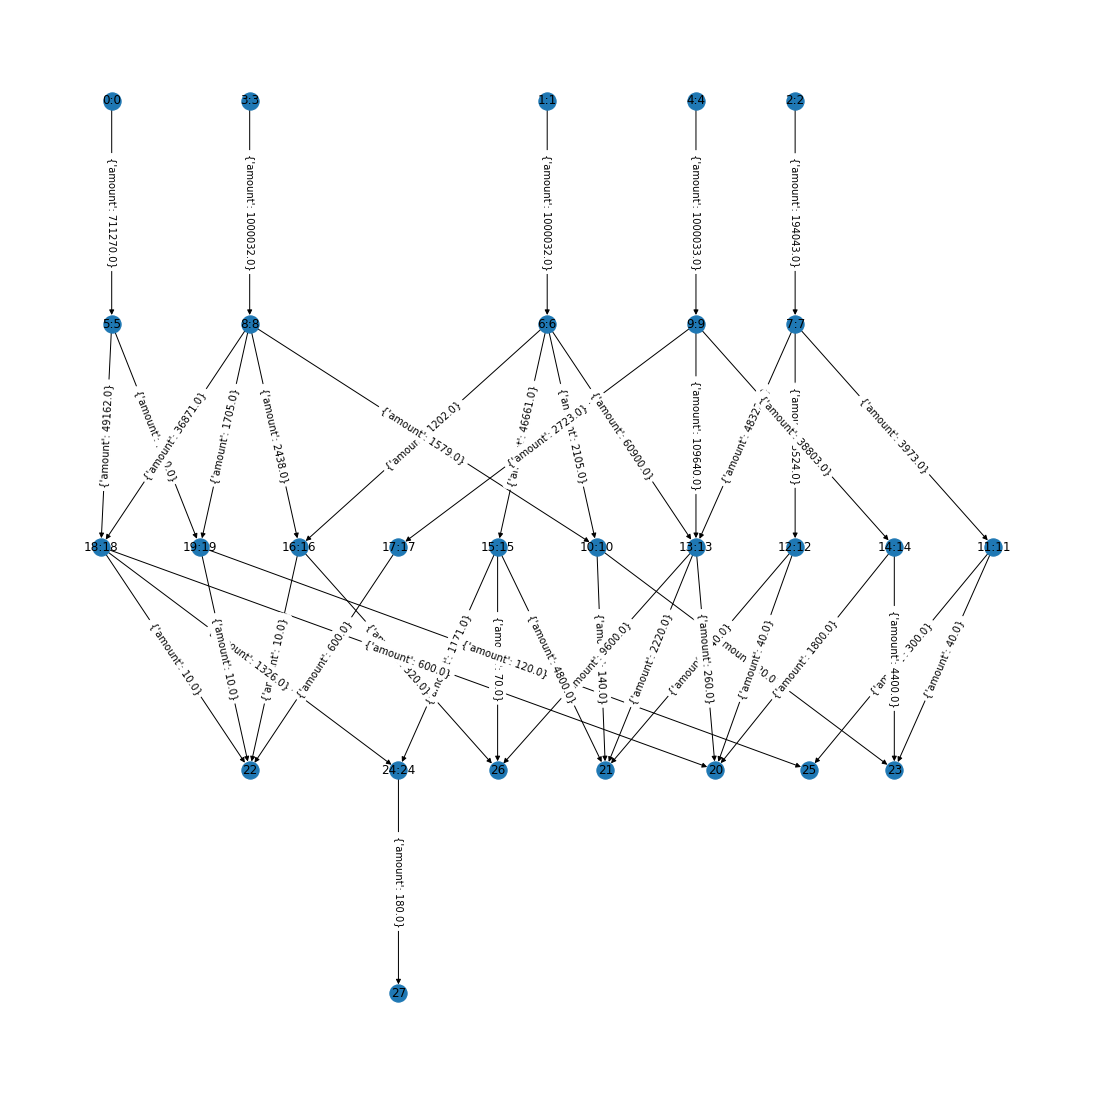

In [35]:
plt.figure(figsize=(15, 15))
#nx.draw_kamada_kawai(G, arrows=True)
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True)
nx.draw_networkx_edge_labels(G, pos)
plt.show()

# Balance

In [36]:
balance_df = econ_sim.read_tick_log_to_df(open("/tmp/balance.log", "rb"), index_name="agent", column_names=["balance"])
balance_df.reset_index(inplace=True)

In [37]:
balance_df[balance_df["tick"] == balance_df["tick"].min()].set_index("agent")

,tick,balance
agent,,
0,0,6.887246e+03
1,0,3.463248e+03
2,0,2.966376e+03
3,0,4.944655e+03
4,0,1.487512e+04
5,0,1.550000e+04
6,0,5.000000e+03
7,0,4.500000e+03
8,0,7.000000e+03


In [38]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].set_index("agent")

,tick,balance
agent,,
0,99999,1.281425e+06
1,99999,2.060256e+06
2,99999,6.252195e+05
3,99999,2.545228e+06
4,99999,9.694010e+06
5,99999,9.929344e+00
6,99999,3.238272e+06
7,99999,6.608140e+01
8,99999,3.744131e+06


<AxesSubplot:xlabel='tick'>

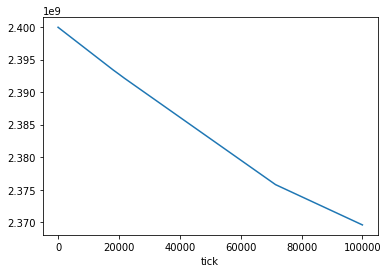

In [39]:
balance_df.groupby("tick")["balance"].sum().plot()

In [40]:
balance_df[balance_df["tick"] == balance_df["tick"].min()]["balance"].describe()

count    3.000000e+01
mean     7.999868e+07
std      3.418060e+08
min      2.966376e+03
25%      1.503134e+04
50%      1.555000e+05
75%      1.159039e+07
max      1.878048e+09
Name: balance, dtype: float64

In [41]:
balance_df[balance_df["tick"] == balance_df["tick"].max()]["balance"].describe()

count    3.000000e+01
mean     7.898610e+07
std      3.415403e+08
min      9.929344e+00
25%      2.998494e+02
50%      1.670840e+06
75%      1.990571e+07
max      1.878048e+09
Name: balance, dtype: float64

In [42]:
ltb_df = balance_df[balance_df["tick"] == balance_df["tick"].max()]

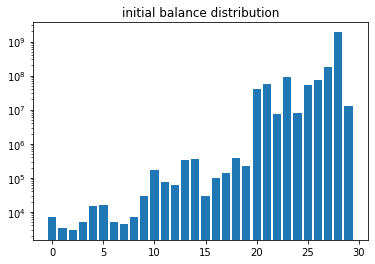

In [43]:
plt.bar(balance_df[balance_df["tick"] == balance_df["tick"].min()]["agent"], balance_df[balance_df["tick"] == balance_df["tick"].min()]["balance"])
plt.title("initial balance distribution")
plt.yscale("log")

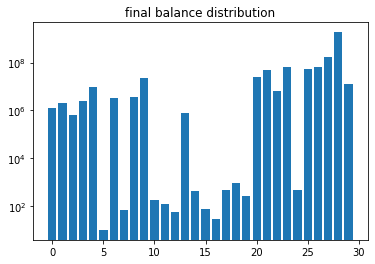

In [44]:
plt.bar(balance_df[balance_df["tick"] == balance_df["tick"].max()]["agent"], balance_df[balance_df["tick"] == balance_df["tick"].max()]["balance"])
plt.title("final balance distribution")
plt.yscale("log")

In [45]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].head(50)

,agent,tick,balance
2999970,0,99999,1.281425e+06
2999971,1,99999,2.060256e+06
2999972,2,99999,6.252195e+05
2999973,3,99999,2.545228e+06
2999974,4,99999,9.694010e+06
2999975,5,99999,9.929344e+00
2999976,6,99999,3.238272e+06
2999977,7,99999,6.608140e+01
2999978,8,99999,3.744131e+06
2999979,9,99999,2.225734e+07


<AxesSubplot:>

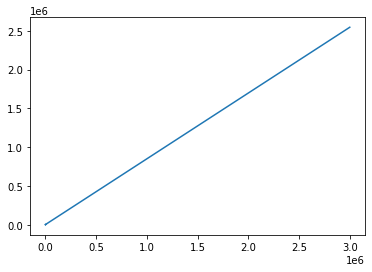

In [46]:
balance_df[balance_df["agent"] == 3]["balance"].plot()

# Inventory

In [47]:
#columns = list(map(lambda x: str(x), range(production_chain_df.shape[0])))
columns=None
inventory_df = econ_sim.read_tick_log_to_df(open("/tmp/inventory.log", "rb"), index_name="agent", column_names=columns)
inventory_df.reset_index(inplace=True)

### Last Tick Inventory

In [48]:
inventory_df[inventory_df["tick"] == inventory_df["tick"].max()]

,agent,tick,0,1,2,3,4,5,6,7,...,20,21,22,23,24,25,26,27,28,29
2999970,0,99999,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999971,1,99999,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999972,2,99999,0.0,0.0,1219.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999973,3,99999,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999974,4,99999,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999975,5,99999,0.0,0.0,0.0,0.0,0.0,660118.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999976,6,99999,0.0,92.0,0.0,0.0,0.0,0.0,889072.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999977,7,99999,0.0,0.0,3.0,0.0,0.0,0.0,0.0,138221.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999978,8,99999,0.0,0.0,0.0,92.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999979,9,99999,0.0,0.0,0.0,0.0,93.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Produced Goods Inventory

In [49]:
agent_goods_df * inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent")

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,tick
0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,1219.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,0.0,0.0,0.0,0.0,0.0,660118.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,889072.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138221.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,957347.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,848774.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


### Input Resources Inventory

In [50]:
inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent") - agent_goods_df * inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent")

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,tick
agent,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,0.0,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


### Production Surplus/Deficit

In [51]:
(inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent") - agent_goods_df * inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent")) - (agent_goods_df @ production_chain_df.T)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,tick
agent,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,0.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,0.0,0.0,0.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [87]:
((inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent") - agent_goods_df * inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent")) - (agent_goods_df @ production_chain_df.T)).loc[27]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21      -24.0
22        0.0
23      -21.0
24      121.0
25      -29.0
26      -38.0
27        0.0
28        0.0
29        0.0
tick      NaN
Name: 27, dtype: float64

# Buy and Sell Prices

In [53]:
buy_price_df = econ_sim.read_tick_log_to_df(open("/tmp/buy_prices.log", "rb"), index_name="agent").reset_index()
sell_price_df = econ_sim.read_tick_log_to_df(open("/tmp/sell_prices.log", "rb"), index_name="agent").reset_index()
max_buy_price_df = econ_sim.read_tick_log_to_df(open("/tmp/max_buy_prices.log", "rb"), index_name="agent").reset_index()
min_sell_price_df = econ_sim.read_tick_log_to_df(open("/tmp/min_sell_prices.log", "rb"), index_name="agent").reset_index()

Text(0.5, 1.0, 'price chart for 21')

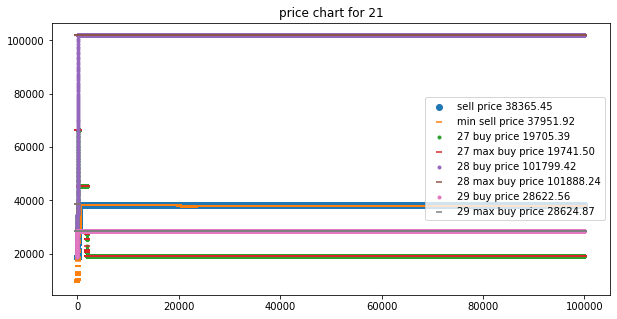

In [89]:
product_id = 21
min_ticks = 0
max_ticks = 300000

df1 = sell_price_df[(sell_price_df[product_id] < np.inf) & (sell_price_df["tick"].between(min_ticks,max_ticks))].groupby("tick")[product_id].min().to_frame().reset_index()
dfms = min_sell_price_df[(min_sell_price_df[product_id] < np.inf) & (min_sell_price_df["tick"].between(min_ticks, max_ticks))].groupby("tick")[product_id].min().to_frame().reset_index()
df2 = buy_price_df[(buy_price_df["tick"].between(min_ticks, max_ticks)) & (buy_price_df[product_id] > 0)][["tick", "agent", product_id]]
dfmb = max_buy_price_df[(max_buy_price_df["tick"].between(min_ticks, max_ticks)) & (max_buy_price_df[product_id] > 0)][["tick", "agent", product_id]]

plt.figure(figsize=(10,5))
plt.scatter(df1["tick"], df1[product_id], label=f'sell price {df1[product_id].mean():.2f}')
plt.scatter(dfms["tick"], dfms[product_id], label=f'min sell price {dfms[product_id].mean():.2f}', marker="_")
for agent in df2["agent"].unique():
    sc = plt.scatter(df2[df2["agent"] == agent]["tick"], df2[df2["agent"] == agent][product_id], label=f'{agent} buy price {df2[df2["agent"] == agent][product_id].mean():.2f}', marker=".")
    plt.scatter(dfmb[dfmb["agent"] == agent]["tick"], dfmb[dfmb["agent"] == agent][product_id], label=f'{agent} max buy price {dfmb[dfmb["agent"] == agent][product_id].mean():.2f}', marker="_")
plt.legend(loc="right")
plt.title(f'price chart for {product_id}')

In [55]:
production_chain.goods_produced[product_id]

15550.0

In [56]:
production_chain.batch_sizes[product_id] * production_chain.adj_matrix[:,product_id]

array([ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [57]:
transaction_df[transaction_df["product"] == product_id]

,tick,seller,buyer,product,amount,price,value
114,18,15,21,15,10.0,63.688277,636.882768
210,27,15,24,15,10.0,70.122471,701.224713
306,36,15,26,15,10.0,77.182832,771.828321
401,45,15,21,15,10.0,84.479889,844.798886
496,54,15,24,15,10.0,92.913182,929.131820
...,...,...,...,...,...,...,...
19720,2094,15,24,15,10.0,3919.140193,39191.401927
19729,2095,15,24,15,10.0,3914.171372,39141.713717
19755,2098,15,24,15,10.0,3953.732923,39537.329229
19806,2104,15,24,15,20.0,4190.067331,83801.346623


In [58]:
transaction_df[transaction_df["seller"] == product_id]

,tick,seller,buyer,product,amount,price,value
114,18,15,21,15,10.0,63.688277,636.882768
210,27,15,24,15,10.0,70.122471,701.224713
306,36,15,26,15,10.0,77.182832,771.828321
401,45,15,21,15,10.0,84.479889,844.798886
496,54,15,24,15,10.0,92.913182,929.131820
...,...,...,...,...,...,...,...
19720,2094,15,24,15,10.0,3919.140193,39191.401927
19729,2095,15,24,15,10.0,3914.171372,39141.713717
19755,2098,15,24,15,10.0,3953.732923,39537.329229
19806,2104,15,24,15,20.0,4190.067331,83801.346623


In [59]:
buy_price_df[buy_price_df["tick"].isin(transaction_df[transaction_df["product"] == product_id]["tick"]) & (buy_price_df[product_id] > 0)][["tick", "agent", product_id]]

,tick,agent,15
561,18,21,69.376554
564,18,24,69.376554
566,18,26,69.376554
831,27,21,75.124866
834,27,24,75.876115
...,...,...,...
63144,2104,24,4217.764604
63146,2104,26,352.730889
63231,2107,21,1378.897442
63234,2107,24,4302.541673


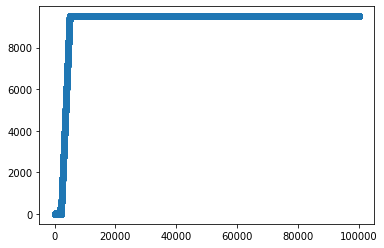

In [60]:
plt.scatter(inventory_df[inventory_df["agent"]==product_id]["tick"], inventory_df[inventory_df["agent"]==product_id][product_id])

In [61]:
inventory_df[(inventory_df["agent"]==product_id) & (inventory_df["tick"] > 20000)][product_id].describe()

count    79999.0
mean      9509.0
std          0.0
min       9509.0
25%       9509.0
50%       9509.0
75%       9509.0
max       9509.0
Name: 15, dtype: float64

In [62]:
buy_price_df[(buy_price_df["agent"] == 11) & (buy_price_df["tick"] > 000)][["tick",5]]

,tick,5
41,1,0.0
71,2,0.0
101,3,0.0
131,4,0.0
161,5,0.0
...,...,...
2999861,99995,0.0
2999891,99996,0.0
2999921,99997,0.0
2999951,99998,0.0


In [63]:
max_buy_price_df[(buy_price_df["agent"] == 22) & (buy_price_df["tick"] > 000)][["tick",10,11,14,16]]

,tick,10,11,14,16
52,1,0.0,0.0,0.0,445.479006
82,2,0.0,0.0,0.0,445.479006
112,3,0.0,0.0,0.0,445.479006
142,4,0.0,0.0,0.0,445.479006
172,5,0.0,0.0,0.0,445.479006
...,...,...,...,...,...
2999872,99995,0.0,0.0,0.0,229.418405
2999902,99996,0.0,0.0,0.0,229.418405
2999932,99997,0.0,0.0,0.0,229.418405
2999962,99998,0.0,0.0,0.0,229.418405


In [64]:
np.where(production_chain.adj_matrix[:,22] > 0)

(array([16, 17, 18, 19]),)

In [65]:
sell_price_df[(sell_price_df["agent"] == 5)][5].describe()

count    100000.000000
mean         20.132162
std          33.613857
min          13.068332
25%          13.068332
50%          13.068332
75%          13.068332
max         233.670128
Name: 5, dtype: float64

In [66]:
min_sell_price_df[(sell_price_df["agent"] == 5)][5].describe()

count    100000.000000
mean         13.068433
std           0.010569
min          13.068332
25%          13.068332
50%          13.068332
75%          13.068332
max          14.827602
Name: 5, dtype: float64

In [67]:
transaction_df[transaction_df["buyer"] == 22].head(50)

,tick,seller,buyer,product,amount,price,value
100,17,17,22,17,10.0,310.171229,3101.712293
195,26,16,22,16,10.0,228.378003,2283.780033
196,26,17,22,17,10.0,339.613905,3396.139048
260,32,19,22,19,10.0,546.236356,5462.363561
262,32,17,22,17,10.0,365.883803,3658.838027
327,38,17,22,17,10.0,393.941038,3939.410382
403,45,17,22,17,10.0,423.888530,4238.885304
451,50,17,22,17,10.0,427.571438,4275.714383
504,55,18,22,18,10.0,1093.090922,10930.909224
521,56,17,22,17,10.0,460.284603,4602.846028


<AxesSubplot:>

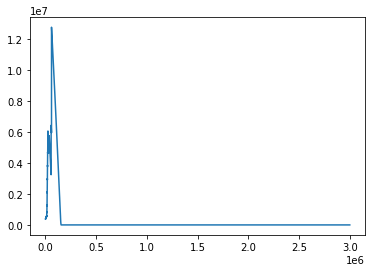

In [68]:
balance_df[balance_df["agent"] == 18]["balance"].plot()

In [69]:
buy_price_df[buy_price_df["tick"] == buy_price_df["tick"].max()].set_index("agent")

,tick,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
agent,,,,,,,,,,,,,,,,,,,,,
0,99999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,99999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,99999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,99999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,99999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
5,99999,484.124108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
6,99999,0.000000,7.430641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
7,99999,0.000000,0.000000,79.961334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
8,99999,0.000000,0.000000,0.000000,10.615202,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [70]:
sell_price_df[sell_price_df["tick"] == sell_price_df["tick"].max()].set_index("agent")

,tick,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
agent,,,,,,,,,,,,,,,,,,,,,
0,99999,11.275382,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1,99999,inf,4.280776,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2,99999,inf,inf,3.362427,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
3,99999,inf,inf,inf,5.534518,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
4,99999,inf,inf,inf,inf,12.48801,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
5,99999,inf,inf,inf,inf,inf,13.068332,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
6,99999,inf,inf,inf,inf,inf,inf,5.829728,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
7,99999,inf,inf,inf,inf,inf,inf,inf,71.640466,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
8,99999,inf,inf,inf,inf,inf,inf,inf,inf,8.07486,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [71]:
buy_price_df[buy_price_df["tick"] == buy_price_df["tick"].max()].set_index("agent").max(axis=0) - sell_price_df[sell_price_df["tick"] == sell_price_df["tick"].max()].set_index("agent").min(axis=0)

tick    0.000000e+00
0       4.728487e+02
1       3.149865e+00
2       7.659891e+01
3       5.080684e+00
4       1.935759e+01
5       4.797690e+02
6       2.730336e+03
7       2.192240e+02
8       6.969528e+03
9       2.665403e+03
10     -1.716181e+03
11     -3.840358e+02
12     -5.937134e+02
13      6.310582e+01
14      2.380484e+03
15      5.413910e+03
16     -1.731665e+02
17      3.432960e+02
18      3.041299e+04
19     -6.174317e+02
20      8.655769e+04
21      6.347286e+04
22      3.482136e+02
23      2.759503e+04
24     -5.601560e+04
25      3.758333e+04
26      4.863128e+04
27     -6.568034e+06
28     -3.756096e+07
29     -2.570170e+05
dtype: float64

In [72]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].set_index("agent")

,tick,balance
agent,,
0,99999,1.281425e+06
1,99999,2.060256e+06
2,99999,6.252195e+05
3,99999,2.545228e+06
4,99999,9.694010e+06
5,99999,9.929344e+00
6,99999,3.238272e+06
7,99999,6.608140e+01
8,99999,3.744131e+06


# Profit Analysis

In [73]:
revenue = transaction_df.groupby("seller")["value"].sum()
costs = transaction_df.groupby("buyer")["value"].sum()

In [74]:
costs

buyer
5     9.295292e+06
6     5.732452e+06
7     1.278774e+06
8     8.075421e+06
9     2.216856e+07
10    3.927495e+05
11    3.542054e+05
12    2.729064e+05
13    8.037583e+06
14    3.656519e+07
15    8.309731e+06
16    4.038504e+05
17    9.126491e+05
18    2.006910e+07
19    4.108403e+05
20    1.481686e+07
21    8.223028e+06
22    7.897887e+05
23    2.342701e+07
24    1.967002e+07
25    4.459487e+05
26    7.217922e+06
27    1.186150e+07
Name: value, dtype: float64

In [75]:
revenue

seller
0     9.295292e+06
1     5.732452e+06
2     1.278774e+06
3     8.075421e+06
4     2.216856e+07
5     9.279802e+06
6     8.965723e+06
7     1.274340e+06
8     1.181255e+07
9     4.439639e+07
10    2.239239e+05
11    2.808277e+05
12    2.109611e+05
13    8.455376e+06
14    3.619610e+07
15    8.280805e+06
16    3.043786e+05
17    7.711116e+05
18    1.968600e+07
19    1.811046e+05
24    1.186150e+07
Name: value, dtype: float64

In [76]:
revenue-costs

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5    -1.549007e+04
6     3.233272e+06
7    -4.433919e+03
8     3.737131e+06
9     2.222784e+07
10   -1.688256e+05
11   -7.337775e+04
12   -6.194531e+04
13    4.177928e+05
14   -3.690935e+05
15   -2.892597e+04
16   -9.947179e+04
17   -1.415375e+05
18   -3.831019e+05
19   -2.297357e+05
20             NaN
21             NaN
22             NaN
23             NaN
24   -7.808519e+06
25             NaN
26             NaN
27             NaN
Name: value, dtype: float64

In [77]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].set_index("agent") - balance_df[balance_df["tick"] == balance_df["tick"].min()].set_index("agent")

,tick,balance
agent,,
0,99999,1.274537e+06
1,99999,2.056793e+06
2,99999,6.222531e+05
3,99999,2.540283e+06
4,99999,9.679135e+06
5,99999,-1.549007e+04
6,99999,3.233272e+06
7,99999,-4.433919e+03
8,99999,3.737131e+06


# Production Efficiency

In [78]:
production_efficiency_df = econ_sim.read_tick_log_to_df(open("/tmp/production_efficiency.log", "rb"), index_name="agent")

In [79]:
production_efficiency_df.index.to_frame()["tick"]

agent  tick 
0      0            0
1      0            0
2      0            0
3      0            0
4      0            0
                ...  
25     99999    99999
26     99999    99999
27     99999    99999
28     99999    99999
29     99999    99999
Name: tick, Length: 3000000, dtype: int64

<AxesSubplot:xlabel='tick'>

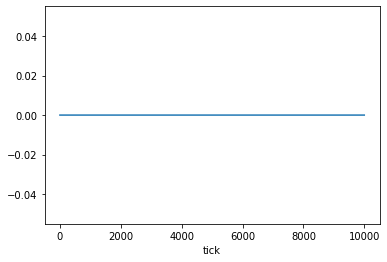

In [80]:
production_efficiency_df[production_efficiency_df.index.to_frame()["tick"] < 10000].groupby("tick").max()[4].plot()

(0.0, 10.645961581310502)

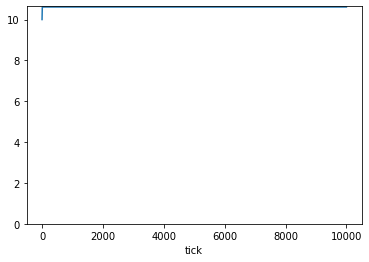

In [81]:
buy_price_df[(buy_price_df["tick"] < 10000)].groupby("tick")[3].max().plot()
plt.ylim(0)

<AxesSubplot:xlabel='tick'>

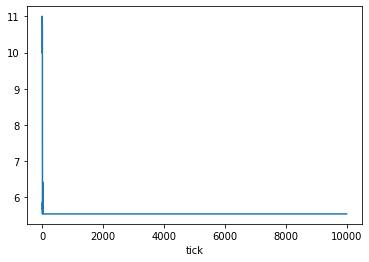

In [82]:
sell_price_df[(sell_price_df["tick"] < 10000)].groupby("tick")[3].min().plot()

In [83]:
sell_price_df.groupby("tick")[3].min().describe()

count    100000.000000
mean          5.535007
std           0.046127
min           5.534518
25%           5.534518
50%           5.534518
75%           5.534518
max          11.005000
Name: 3, dtype: float64

<AxesSubplot:xlabel='tick'>

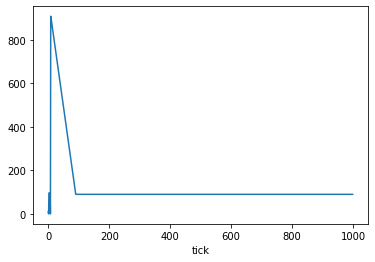

In [84]:
inventory_df[(inventory_df["tick"] < 1000) & (inventory_df["agent"] == 3)].groupby("tick")[3].max().plot()

<AxesSubplot:xlabel='tick'>

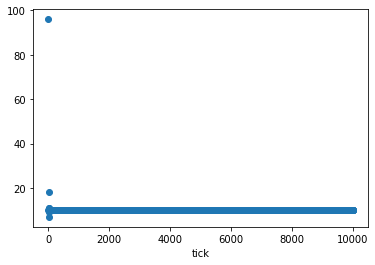

In [85]:
transaction_df[(transaction_df["tick"] < 10000) & (transaction_df["seller"] == 3)].groupby("tick")["amount"].sum().plot(marker="o", linestyle='none')

In [86]:
transaction_df[(transaction_df["tick"] < 10000) & (transaction_df["seller"] == 3)]

,tick,seller,buyer,product,amount,price,value
2,1,3,8,3,10.0,10.05000,100.500000
12,7,3,8,3,96.0,10.59328,1016.954909
16,8,3,8,3,18.0,8.07486,145.347474
21,9,3,8,3,7.0,8.07486,56.524018
35,10,3,8,3,11.0,8.07486,88.823457
...,...,...,...,...,...,...,...
70158,9995,3,8,3,10.0,8.07486,80.748597
70163,9996,3,8,3,10.0,8.07486,80.748597
70168,9997,3,8,3,10.0,8.07486,80.748597
70173,9998,3,8,3,10.0,8.07486,80.748597
